# Scenerio
***
This fraudulent detection notebook will describe a process to identify fraudulent spirit formulas. This notebook will also analyze wine formulas in the process of analyzing spirits formulas. In this notebook, fraudulent formulas will be compared to valid formulas by describing how closely one formula resembles propietary formula in the dataset.

* First: Train Spirits, and Wine Models
* Second: Analyze Trained, and Input Output
* Third: Display Wine Output
* Fourth: Display Spirits Output

In [2]:
import os
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist, squareform
import statistics #mean and standard dev measurements
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

plt.rcParams["figure.figsize"]=10,10 #configure plot size

os.chdir(os.environ['MLDIR'] + '/TestData/formula_fraud/')

# Train Spirits, and Wine Models
***
The below cell trains the input real wine data, and the synthetic spirits data. The wine data is organized into 3 groups of wines. The data comes from the following URL: https://archive.ics.uci.edu/ml/datasets/wine. The input UCI wine table describes the formula for individual wines in the three groups. The spirits data is completely synthetic, and generated for demonstration purposes.

In [3]:
#Train wine data model
df_w = pd.read_csv('wine.data.csv')

col_w = []
col_w.append('group') 
col_w.append('alcohol') 
col_w.append('malic_acid') 
col_w.append('ash')
col_w.append('alcalinity')
col_w.append('magnesium')
col_w.append('phenols')
col_w.append('flavanoids')
col_w.append('nonflavanoid_phenol')
col_w.append('proanthcyanins')
col_w.append('color_intensity')
col_w.append('hue')
col_w.append('diluted_wines')
col_w.append('proline')

df_w.columns = col_w

X_embedded_w = TSNE(n_components=2).fit_transform(df_w)
X_embedded_w = pd.DataFrame(X_embedded_w, columns=['x_val', 'y_val'])

X_embedded_w['type'] = 0
X_embedded_w['type'] = df_w.iloc[:,0]

X_embedded_w.loc[X_embedded_w['type'] == 1, 'type'] = 'wine_1'
X_embedded_w.loc[X_embedded_w['type'] == 2, 'type'] = 'wine_2'
X_embedded_w.loc[X_embedded_w['type'] == 3, 'type'] = 'wine_3'

# Train spirits data model
column_names = []
column_names.append('type')
column_names.append('ethyl')
column_names.append('methonal')
column_names.append('glycerol')
column_names.append('propanol')
column_names.append('coumarin')
column_names.append('citric_acid')
column_names.append('acetaldehyde')
column_names.append('isoamyl_alcohol')
column_names.append('impurities')
for i in range(90):
    column_names.append('add_ingredient'+str(i))
    
tmp_df = pd.read_csv('spirits_train_data.csv')

df_s = pd.DataFrame(tmp_df,columns=column_names)
X_embedded_s = TSNE(n_components=2).fit_transform(df_s)
X_embedded_s = pd.DataFrame(X_embedded_s, columns=['x_val', 'y_val'])
X_embedded_s['type'] = 0
X_embedded_s['type'] = df_s.iloc[:,0]

X_embedded_s.loc[4, 'type'] = 5
X_embedded_s.loc[X_embedded_s['type'] == 0, 'type'] = 'vodka'
X_embedded_s.loc[X_embedded_s['type'] == 1, 'type'] = 'rum'
X_embedded_s.loc[X_embedded_s['type'] == 2, 'type'] = 'whiskey'
X_embedded_s.loc[X_embedded_s['type'] == 3, 'type'] = 'brandy'
X_embedded_s.loc[X_embedded_s['type'] == 4, 'type'] = 'gin'
X_embedded_s.loc[X_embedded_s['type'] == 5, 'type'] = 'fraud_vodka'

# Analyze Trained, and Input Data
***
The below cell shows the input real wine data, and the trained output data. The below cell also shows the synthetic spirits data, both input, and trained output data. Analysis will show that the wine data has 13 columns, and the syntheic spirits data has 100 columns. Since most of the wine formula is mostly grape of some form, the changes in the wine formula will cause a "linear" movement of the changing wine formula. If the wine formula changes in a "non-linear" method, it becomes something other than wine. 

The spirits data will show that since the wine data clusters, logically, the spirits will cluster in more of an elliptical manner. Real spirit data is propietary, and highly protected. Consequently, the input data is synthetic, and clusters artifically.

In [4]:
print('Wine Input Data')
display(df_w.head())
print('Spirits Input Data')
display(df_s.head())
print('Trained Wine Data')
display(X_embedded_w)
print('Trained Spirit Data')
display(X_embedded_s)
    
    

Wine Input Data


,group,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoid_phenol,proanthcyanins,color_intensity,hue,diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Spirits Input Data


,type,ethyl,methonal,glycerol,propanol,coumarin,citric_acid,acetaldehyde,isoamyl_alcohol,impurities,...,add_ingredient80,add_ingredient81,add_ingredient82,add_ingredient83,add_ingredient84,add_ingredient85,add_ingredient86,add_ingredient87,add_ingredient88,add_ingredient89
0,1,2.456913,1.254107,1.453961,1.536800,0.481717,0.609271,1.207817,1.654135,2.564021,...,2.156512,2.664057,1.025385,3.122031,1.626412,3.407616,2.602341,2.164176,2.047368,0.767397
1,0,0.057143,2.101622,0.884119,2.704298,1.633250,0.269017,0.843732,0.499406,1.802072,...,1.888515,1.301460,2.517023,2.156765,1.997051,-1.186179,3.323790,2.736919,4.566475,2.812993
2,3,3.134865,0.281609,3.055951,1.363279,1.876124,0.524418,2.213087,1.695274,1.013712,...,0.223124,3.525073,2.763486,0.887910,2.960680,0.632482,0.100387,-0.043816,2.195956,-0.443376
3,4,-0.641115,2.021125,2.283115,0.582500,1.482482,2.104150,1.464874,1.127270,2.235188,...,1.934240,2.055834,2.672527,1.387247,2.535532,1.044288,0.220498,1.997146,3.913699,1.431429
4,0,0.039294,1.706540,0.646560,2.821327,3.059975,2.875435,-0.467113,0.067731,1.330263,...,1.463126,1.130646,3.978197,2.829895,-0.112976,1.179699,2.003402,1.950558,0.627345,1.898897


Trained Wine Data


,x_val,y_val,type
0,6.123991,9.988443,wine_1
1,7.719144,11.891682,wine_1
2,9.398051,14.169539,wine_1
3,1.466039,3.274398,wine_1
4,9.030585,14.195180,wine_1
...,...,...,...
172,1.797176,3.017251,wine_3
173,2.019043,3.389645,wine_3
174,3.387658,5.618697,wine_3
175,3.364325,5.842511,wine_3


Trained Spirit Data


,x_val,y_val,type
0,2.144064,-6.078721,rum
1,-3.496153,-6.526300,vodka
2,4.317410,-0.013687,brandy
3,-6.722639,-2.442993,gin
4,-3.001387,-7.375301,fraud_vodka
...,...,...,...
95,-1.673874,-0.463233,whiskey
96,-6.079894,-1.576108,gin
97,-6.460661,-2.674942,gin
98,1.883026,-6.435884,rum


# Display Wine Data
***
This cell visulaizes the trained wine data. It shows how wine changes "linearly". If the individual wine formula would change in a perpendicular manner. It would become something other than wine. Since this real wine data clusters in a linear manner. In theory, likewise, the spirits formulas should cluster.

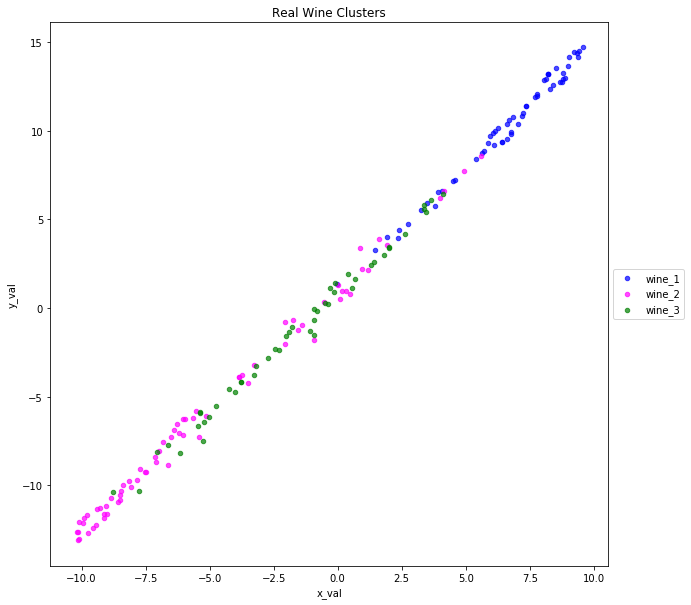

In [5]:

colors_w = {'wine_1':'blue', 'wine_2':'magenta', 'wine_3':'green', 'brandy':'yellow', 'gin':'brown'}
fig, ax = plt.subplots(1,1, figsize=(10, 10))
grouped_w = X_embedded_w.groupby('type')
for key, group in grouped_w:
    group.plot(ax=ax, kind='scatter', x='x_val', y='y_val', label=key, color=colors_w[key], alpha=0.7)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#    plt.axis('off')
plt.title('Real Wine Clusters')
plt.show()

# Display Spirits Data
***
This cell visulaizes the trained spirits data. This visualization dramatizes how spirits would cluster. This cartoon indicates how a fraud formula, the red dot in the blue cluster, can be detected through a visual process. The red dot is very close to a valid vodka formula, indicating that the "fraud_vodka" formula is most likely a replica of the propietary formula.

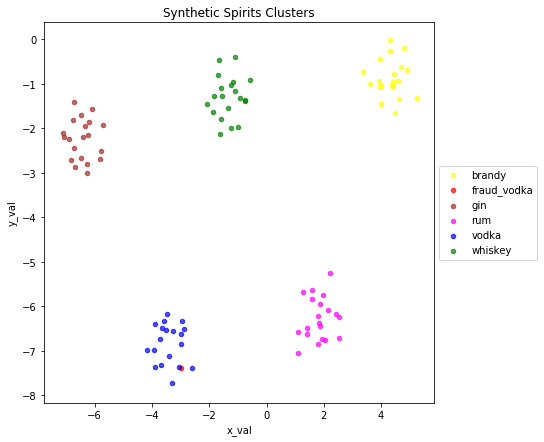

In [6]:
colors = {'vodka':'blue', 'rum':'magenta', 'whiskey':'green', 'brandy':'yellow', 'gin':'brown', 'fraud_vodka':'red'}

fig, ax = plt.subplots(1,1, figsize=(7, 7))
grouped_s = X_embedded_s.groupby('type')
for key, group in grouped_s:
    group.plot(ax=ax, kind='scatter', x='x_val', y='y_val', label=key, color=colors[key], alpha=0.7)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#    plt.axis('off')
plt.title('Synthetic Spirits Clusters')
plt.show()